In [1]:
# pacote simbólico
import sympy
sympy.init_printing()

# geração dos símbolos
# s: variável de Laplace
# t: tempo
s, t = sympy.symbols('s t')

In [6]:
# Função Transformada de Laplace
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

# Função Transformada de Laplace Inversa
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [13]:
# Tranformada de Laplace da entrada exp(-2*t)*2
F = L(sympy.exp(-9*t)*70)
F

 70  
─────
s + 9

In [14]:
# Função Transferência do sistema
G = 1/(s**2 + 5*s + 4)
G

     1      
────────────
 2          
s  + 5⋅s + 4

In [15]:
# resposta descrita no Domínio de Laplace
X = G*F
X

          70          
──────────────────────
        ⎛ 2          ⎞
(s + 9)⋅⎝s  + 5⋅s + 4⎠

In [16]:
# Expansão em Frações Parciais da resposta
X.apart(s)

    7          14           35    
───────── - ───────── + ──────────
4⋅(s + 9)   3⋅(s + 4)   12⋅(s + 1)

In [17]:
# resposta temporal via Transformada Inversa de Laplace

invL(X)


    -t            -4⋅t           -9⋅t     
35⋅ℯ  ⋅θ(t)   14⋅ℯ    ⋅θ(t)   7⋅ℯ    ⋅θ(t)
─────────── - ───────────── + ────────────
    12              3              4      

In [18]:
# pacote para plotar gráficos
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6,7) # tamanho do gráfico
plt.rcParams['font.size'] = 12 # tamanho da letra

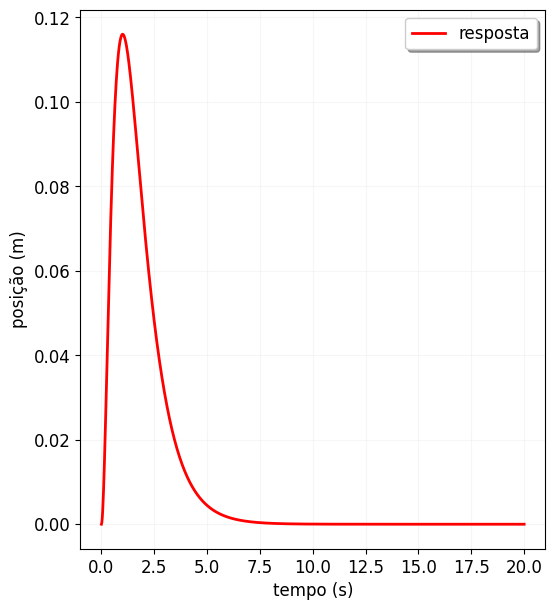

In [19]:
# plotar a resposta encontrada
t = np.linspace(0, 20, 1001) # vetor tempo de 0 a 20 segundos com 1001 pontos
u = 2/3*(np.exp(-1*t))-1*(np.exp(-2*t))+1/3*(np.exp(-4*t)) # vetor resposta de acordo com o simbólico

# figura
plt.plot(t, u, 'r', linewidth=2, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.1)
plt.ylabel('posição (m)')
plt.xlabel('tempo (s)')
plt.show()